In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

_30k_main_palette_dict = {
    "blue": "#202F66",
    "orange": "#FF7048",
    "purple": "#8B87EA",
    "pink": "#D869AB",
    "cyan": "#54C9B9",
    "yellow": "#F3D36E",
}

_30k_danger_safe_palette_dict = {
    "danger": "#FF4F72",
    "safe": "#58EDB9",
}

_30k_text_palette_dict = {
    "text_black": "#32363A",
    "text_lighter1": "#6F7273",
    "text_lighter2": "#8B8E8F",
    "bg_cream": "#FAF7F4"
}

_font_mono = "Inconsolata"
_font_serif = "Canela"
_font_sans = "Gill Sans Nova"

plt.style.use("./utils/minus_thirty_k.mplstyle")

_30k = list(_30k_main_palette_dict.values())
sns.set_palette(_30k)

import warnings

warnings.filterwarnings('ignore')

from utils.tweets_utils import *


import lorem

import matplotlib

# The proportion of mention and retweet of top mentioned accounts

In [2]:
tweets = pd.read_csv("./data/tweets_2019-2020.csv")

In [3]:
df = pd.read_csv("./data/users_lookup.csv")

In [4]:
df.head(20)

,numeric_id,user_id,mention_freq,RT_freq,reply_freq
0,1214742430601187328,@army2pr,1830,1293,399
1,229313308,@armypr_news,1559,958,591
2,267243786,@WassanaNanuam,921,705,202
3,358491915,@1st_Army_Area,782,476,302
4,337604843,@weloverta,437,255,182
5,37950212,@ThaiPBS,436,253,179
6,1040252793339240448,@prayutofficial,347,211,129
7,199992361,@political_drama,346,279,40
8,1206467004338556929,@JuahuaHeadline,324,166,157
9,87732915,@SpringNews_TV,292,142,150


Text(-0.024999999999999994, -0.07, 'Source:\n-Twitter IO dataset October 2020\n-Stanford - Cheerleading Without Fans: A Low-Impact Domestic Information Operation by the Royal Thai Army ')

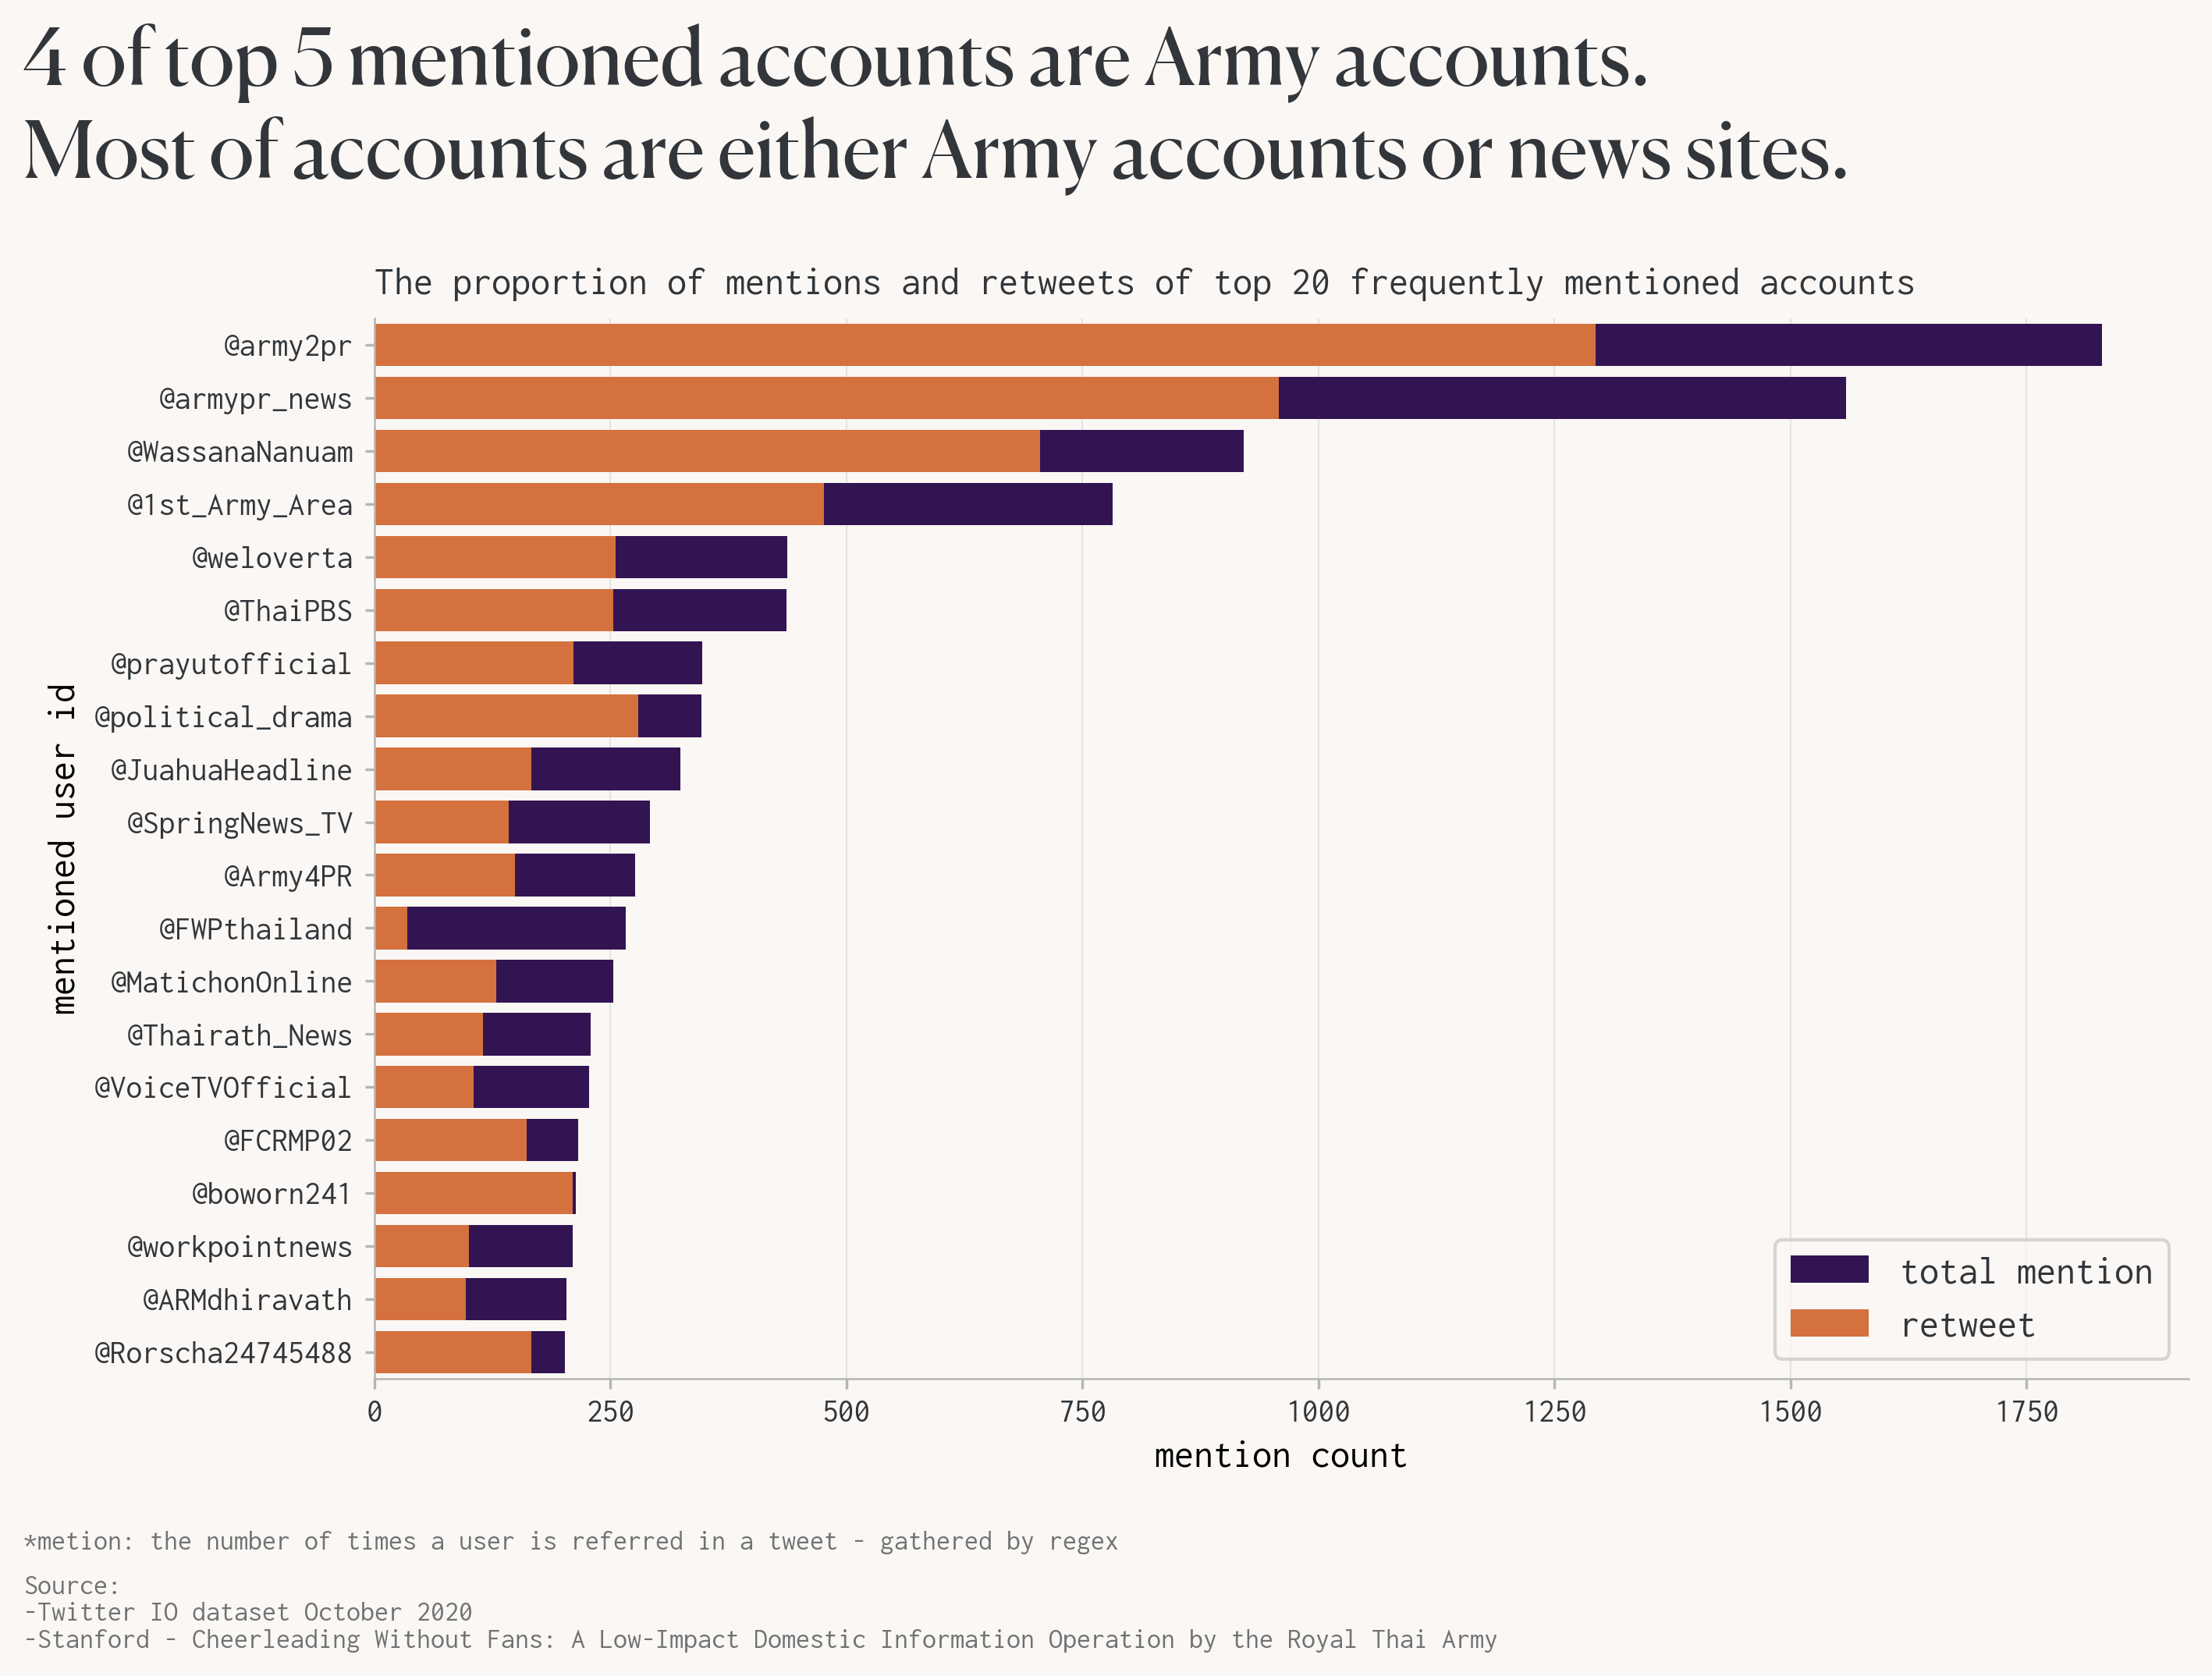

In [38]:
top =20

fig = plt.figure(figsize=(10, 6))

colours = sns.color_palette('inferno', 5)

bar = sns.barplot(df.head(top)['mention_freq'], y=df.head(top)['user_id'], 
            color=colours[0], label='total mention')

sns.barplot(df.head(top)['RT_freq'], y=df.head(top)['user_id'], 
            color=colours[3], label='retweet')


# sns.barplot(df.head(top)['reply_freq'], y=df.head(top)['user_id'], 
#             color=colours[4], label='reply')

# create a new column for plotting RT if RT < reply
df['RT1'] = df['RT_freq']
df.loc[(df[df['RT_freq'] > df['reply_freq']]).index, 'RT1'] = np.nan

sns.barplot(df.head(top)['RT1'], y=df.head(top)['user_id'], 
            color=colours[3])

df.drop(columns=['RT1'], inplace=True)


ax = plt.gca()

plt.legend()
plt.title(f"The proportion of mentions and retweets of top {top} frequently mentioned accounts")
plt.xlabel('mention count')
plt.ylabel('mentioned user id')

fig.suptitle("4 of top 5 mentioned accounts are Army accounts.\nMost of accounts are either Army accounts or news sites.", 
            ha='left', va='bottom',
             x=ax.get_position().x0-0.15, y=ax.get_position().y1*1.1, 
             fontsize=15*1.618,
             fontfamily="Canela"
            )

plt.figtext(x=ax.get_position().x0-0.15, y=ax.get_position().y0-0.125, 
           s="*mention: the number of times a user is referred in a tweet - gathered by regex",
           fontsize=14/1.618, color=_30k_text_palette_dict['text_lighter1'],
            ha='left', va='bottom'
           )

plt.figtext(x=ax.get_position().x0-0.15, y=ax.get_position().y0-0.195, 
           s="Source:\n-Twitter IO dataset October 2020\n-Stanford - Cheerleading Without Fans: A Low-Impact Domestic Information Operation by the Royal Thai Army " ,
           fontsize=14/1.618, color=_30k_text_palette_dict['text_lighter1'],
            ha='left', va='bottom'
           )